## Insurance price prediction using Multiple Linear Regression

Difference between LR and MLR is that in MLR you can have more than one input argument.

$$ LR = M_1\cdot x_1 + I $$

$$ MLR = M_1\cdot x_1 + M_2\cdot x_2 + \dots + M_n\cdot x_n + I $$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Read the insurance data

In [2]:
# Read the data
df = pd.read_csv("./insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Convert data to the usefull datatypes

In [3]:
# Convert string variables to numeric types
df["sex"] = df["sex"].astype("category")
df["sex"] = df["sex"].cat.codes

df["smoker"] = df["smoker"].astype("category")
df["smoker"] = df["smoker"].cat.codes

df["region"] = df["region"].astype("category")
df["region"] = df["region"].cat.codes
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [4]:
# Check if the data contains any null or Nans
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### EDA

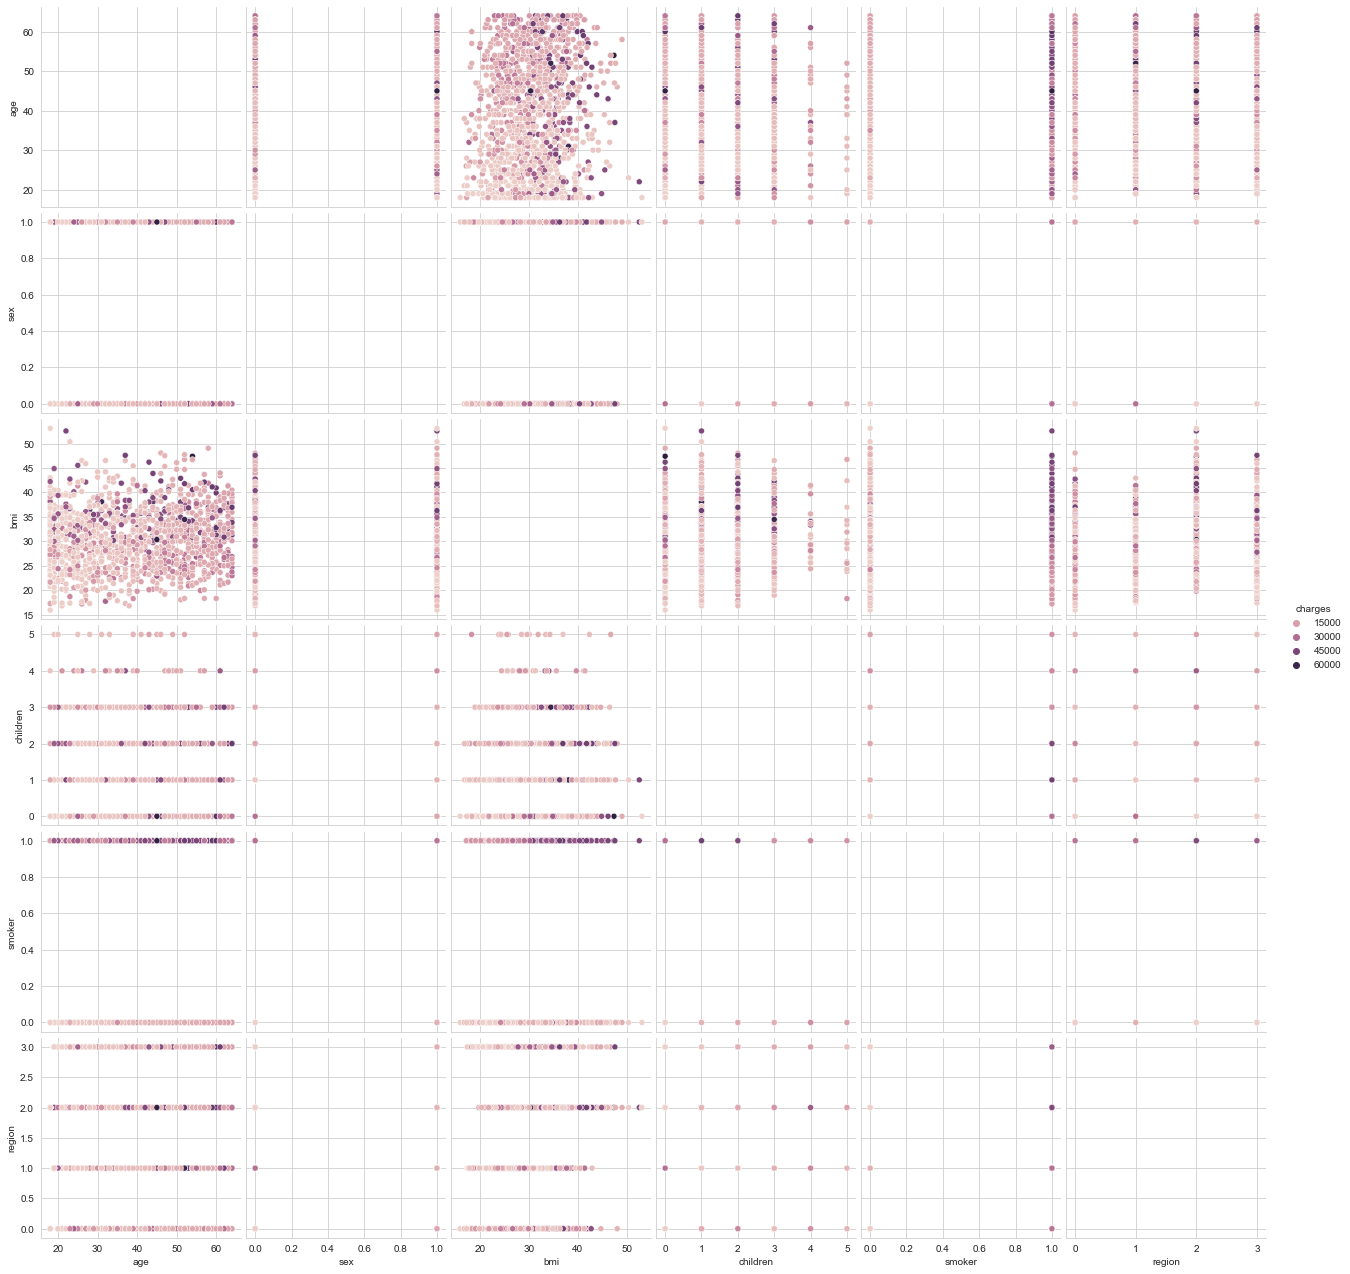

C:\Users\ssipikal\AppData\Local\Temp\ipykernel_22760\1225497808.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  plt.scatter(df.drop(["charges"], 1), df["charges"])


ValueError: x and y must be the same size

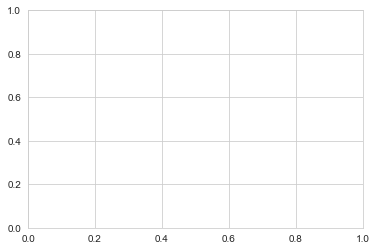

In [8]:
plt.close();
sn.set_style("whitegrid");
sn.pairplot(df, hue="charges", height=3);
plt.show()

plt.scatter(df.drop(["charges"], 1), df["charges"])
plt.show()

### Create training data

In [6]:
# Create training data
features = df.drop(columns="charges")
targets = df["charges"]

x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=4)

### Create and train the model

In [7]:

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### Accuracy of the model

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(x_test)).round(2)

0.72